In [1]:
library(glmnet)
library(ggplot2)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [2]:
options(stringsAsFactors = FALSE)

In [18]:
base_dir <- "/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/feature_selection/"

# Generate lambda sequence:
- fit on orginal data set (b/f) bootstrapping to get lambda sequence (100 lambdas) 
- use this sequence of lambdas for bootstrapping

In [5]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_normalized_counts.RData")

In [6]:
cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_metadata.csv")

In [7]:
ls()
dim(cardioAICS)

[1] "base_dir"      "cardioAICS"    "cell_metadata"

[1] 22187 14573

In [8]:
cardioAICS <- t(cardioAICS)

In [9]:
diff_day <- cell_metadata$day
diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- cell_metadata$X

diff_day <- as.factor(diff_day)

# get lambda sequence to use in all bootstraps
fit <- glmnet(cardioAICS, diff_day, family = "binomial", nlambda = 100, alpha = 0.5)
lambda_seq1 <- fit$lambda

### Lambda sequence for early late small molecule

In [10]:
small_mol <- cell_metadata$protocol == "Lian"
exp_mat <- cardioAICS[small_mol,]

diff_day <- cell_metadata$day[small_mol]

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- cell_metadata$X[small_mol]

diff_day <- as.factor(diff_day)

fit <- glmnet(exp_mat, diff_day, family = "binomial", nlambda = 100, alpha = 0.5)
lambda_seq2 <- fit$lambda

### Lambda sequence for early late cytokine

In [11]:
cytokine <- cell_metadata$protocol == "Murry"
exp_mat <- cardioAICS[cytokine,]

diff_day <- cell_metadata$day[cytokine]

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- cell_metadata$X[cytokine]

diff_day <- as.factor(diff_day)

fit <- glmnet(exp_mat, diff_day, family = "binomial", nlambda = 100, alpha = 0.5)
lambda_seq3 <- fit$lambda

### Lambda sequence for early (cytokine and small molecule)

In [12]:
early_cells <- cell_metadata$day %in% c("D12", "D14")
exp_mat <- cardioAICS[early_cells,]

diff_day <- cell_metadata$day[early_cells]

names(diff_day) <- cell_metadata$X[early_cells]

diff_day <- as.factor(diff_day)

fit <- glmnet(exp_mat, diff_day, family = "binomial", nlambda = 100, alpha = 0.5)
lambda_seq4 <- fit$lambda

### Lambda sequence for late (cytokine and small molecule)

In [13]:
late_cells <- cell_metadata$day %in% c("D24", "D26")
exp_mat <- cardioAICS[late_cells,]

diff_day <- cell_metadata$day[late_cells]

names(diff_day) <- cell_metadata$X[late_cells]

diff_day <- as.factor(diff_day)

fit <- glmnet(exp_mat, diff_day, family = "binomial", nlambda = 100, alpha = 0.5)
lambda_seq5 <- fit$lambda

### Lambda sequence
- create one lambda sequence to use for all (evenly spaced on log scale from min to max of union of all lambda sequences)

In [14]:
all_lambda <- union(union(union(lambda_seq1, lambda_seq2), union(lambda_seq3, lambda_seq4)), lambda_seq5)

In [19]:
lambda_seq <- exp(seq(log(max(all_lambda)), log(min(all_lambda)), length.out = 100))
lambda_seq
save(lambda_seq, file = paste0(base_dir, "all_lambda_seq_log.RData"))

[1] 0.563011961 0.535036616 0.508451329 0.483187032 0.459178086 0.436362113
  [7] 0.414679837 0.394074926 0.374493846 0.355885725 0.338202218 0.321397381
 [13] 0.305427556 0.290251251 0.275829037 0.262123444 0.249098865 0.236721461
 [19] 0.224959074 0.213781145 0.203158633 0.193063940 0.183470839 0.174354407
 [25] 0.165690960 0.157457987 0.149634101 0.142198974 0.135133288 0.128418688
 [31] 0.122037727 0.115973828 0.110211237 0.104734981 0.099530834 0.094585274
 [37] 0.089885452 0.085419159 0.081174790 0.077141319 0.073308265 0.069665671
 [43] 0.066204073 0.062914477 0.059788337 0.056817531 0.053994340 0.051311430
 [49] 0.048761831 0.046338918 0.044036396 0.041848284 0.039768896 0.037792830
 [55] 0.035914953 0.034130385 0.032434490 0.030822861 0.029291313 0.027835865
 [61] 0.026452736 0.025138334 0.023889242 0.022702216 0.021574172 0.020502179
 [67] 0.019483452 0.018515344 0.017595340 0.016721050 0.015890202 0.015100639
 [73] 0.014350307 0.013637259 0.012959641 0.012315693 0.011703742 0.011122198
 [79] 0.010569550 0.010044362 0.009545271 0.009070979 0.008620253 0.008191924
 [85] 0.007784878 0.007398057 0.007030457 0.006681123 0.006349146 0.006033665
 [91] 0.005733860 0.005448952 0.005178200 0.004920902 0.004676389 0.004444025
 [97] 0.004223207 0.004013361 0.003813943 0.003624433

# Make list of early vs. late genes

In [2]:
options(stringsAsFactors = FALSE)

In [3]:
base_dir <- "/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/feature_selection/"

In [4]:
load(paste0(base_dir, "early_late.RData"))

In [5]:
length(bootstraps)

[1] 1000

In [7]:
lambda_sequence <- bootstraps[[1]][["lambda"]]
genes <- rownames(coef(bootstraps[[1]], s = lambda_sequence[1]))

In [8]:
head(genes)

[1] "(Intercept)"  "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"  
[6] "MALAT1_HUMAN"

In [9]:
head(lambda_sequence)

[1] 0.5630120 0.5350366 0.5084513 0.4831870 0.4591781 0.4363621

In [10]:
genes <- genes[2:length(genes)]

In [11]:
head(genes)
length(genes)
num_genes <- length(genes)

[1] "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"   "MALAT1_HUMAN"
[6] "PIGP_HUMAN"

[1] 22187

In [12]:
nonzero_gene_count <- c()
lambda <- min(lambda_sequence)

genes_coeff <- coef(bootstraps[[1]], s = lambda)
genes_coeff <- genes_coeff[2:length(genes_coeff),]
gene_names <- names(genes_coeff)
genes_nonzero <- gene_names[abs(genes_coeff) > 0]
nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))

genes_intersect <- genes_nonzero

for (i in 2:length(bootstraps)) {
    lambda_seq <- bootstraps[[i]][["lambda"]]
    if (lambda < tail(lambda_seq, n = 1)) {
        print(i)
    } 
    genes_coeff <- coef(bootstraps[[i]], s = lambda)
    genes_coeff <- genes_coeff[2:length(genes_coeff),]
    gene_names <- names(genes_coeff)
    genes_nonzero <- gene_names[abs(genes_coeff) > 0]
    nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))
    genes_intersect <- intersect(genes_intersect, genes_nonzero)
}

### Non-zero genes in all rounds

In [13]:
print(length(genes_intersect))
genes_intersect

[1] 77


[1] "MAN1C1_HUMAN"        "ACTA1_HUMAN"         "MYH6_HUMAN"         
 [4] "PTPRD_HUMAN"         "INPP4B_HUMAN"        "COL2A1_HUMAN"       
 [7] "ADAMTS12_HUMAN"      "CCDC141_HUMAN"       "PDLIM3_HUMAN"       
[10] "FAM189A2_HUMAN"      "FHOD3_HUMAN"         "GRIN2A_HUMAN"       
[13] "MYL4_HUMAN"          "GOLIM4_HUMAN"        "TNS1_HUMAN"         
[16] "NAV1_HUMAN"          "PRTG_HUMAN"          "PLN_HUMAN"          
[19] "VCAN_HUMAN"          "MYO1D_HUMAN"         "CNTN5_HUMAN"        
[22] "PPP2R3A_HUMAN"       "BMPER_HUMAN"         "KCNH7_HUMAN"        
[25] "KCNQ5_HUMAN"         "FAM19A4_HUMAN"       "ARHGAP42_HUMAN"     
[28] "GPC3_HUMAN"          "WWOX_HUMAN"          "SAMD4A_HUMAN"       
[31] "ANKRD1_HUMAN"        "ATP13A3_HUMAN"       "STK39_HUMAN"        
[34] "KDR_HUMAN"           "RBMS3_HUMAN"         "LSAMP_HUMAN"        
[37] "TANC2_HUMAN"         "FRMD4B_HUMAN"        "MYH7_HUMAN"         
[40] "EGFEM1P_HUMAN"       "FBXL7_HUMAN"         "GJA3_HUMAN"         
[43] "BMP2_HUMAN"          "PAM_HUMAN"           "PDGFD_HUMAN"        
[46] "SORCS3_HUMAN"        "RNF150_HUMAN"        "DYSF_HUMAN"         
[49] "NAP1L1_HUMAN"        "ADAM28_HUMAN"        "NT5C2_HUMAN"        
[52] "MEF2C_HUMAN"         "ST6GAL1_HUMAN"       "DYNC1H1_HUMAN"      
[55] "H19_HUMAN"           "HAPLN1_HUMAN"        "FLRT2_HUMAN"        
[58] "LINC00881_HUMAN"     "PIP4K2A_HUMAN"       "RXRG_HUMAN"         
[61] "C20orf166-AS1_HUMAN" "FLNA_HUMAN"          "EPB41L4A_HUMAN"     
[64] "FTL_HUMAN"           "MOXD1_HUMAN"         "SV2C_HUMAN"         
[67] "RPS6_HUMAN"          "FSHR_HUMAN"          "PRSS35_HUMAN"       
[70] "ITPKB_HUMAN"         "MDK_HUMAN"           "PLCL1_HUMAN"        
[73] "DOK4_HUMAN"          "KIF1A_HUMAN"         "NPNT_HUMAN"         
[76] "UCHL1_HUMAN"         "LIN28A_HUMAN"

### Distribution of non-zero genes at min lambda

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


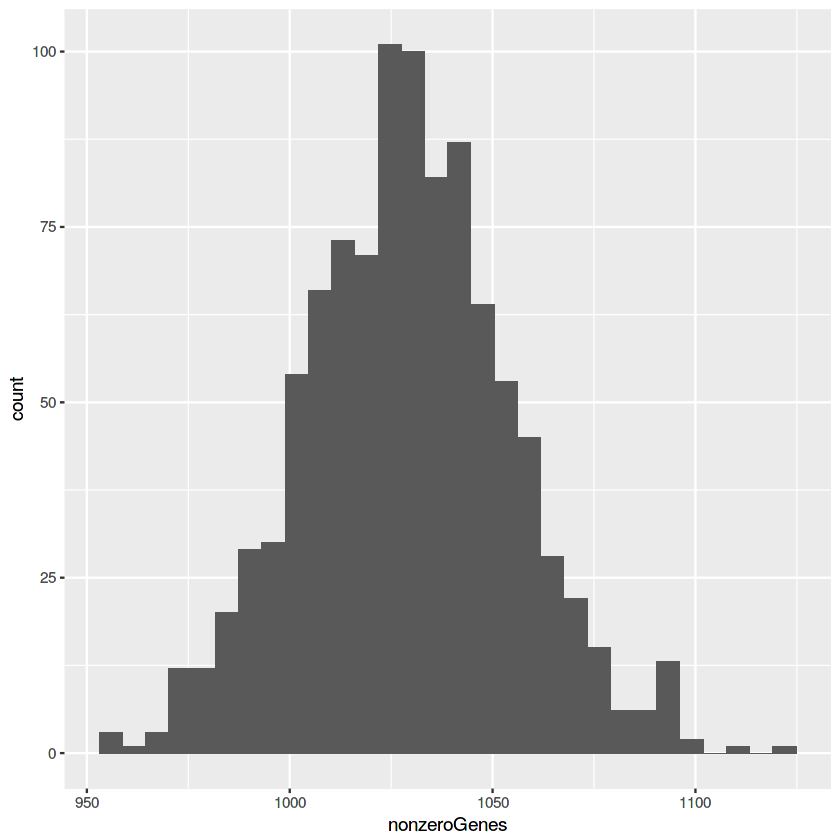

In [14]:
nonzero_gene_count <- as.data.frame(nonzero_gene_count)
colnames(nonzero_gene_count) <- "nonzeroGenes"
ggplot(nonzero_gene_count) + geom_histogram(aes(nonzeroGenes))

### Compare gene list to previous analysis (remove_1s2exp data)

In [15]:
remove_1st2exp_genes <- c('MAN1C1_HUMAN','FBN2_HUMAN','CACNA1C_HUMAN','MYH6_HUMAN','ATXN1_HUMAN','RYR2_HUMAN','PTPRD_HUMAN','INPP4B_HUMAN','COL2A1_HUMAN','CORIN_HUMAN','CCDC141_HUMAN','ROBO2_HUMAN','FAM189A2_HUMAN','FHOD3_HUMAN','GRIN2A_HUMAN','MYL4_HUMAN','GOLIM4_HUMAN','TNS1_HUMAN','NAV1_HUMAN','PRTG_HUMAN','PLN_HUMAN','VCAN_HUMAN','MYO1D_HUMAN','CNTN5_HUMAN','COLEC12_HUMAN','PRICKLE1_HUMAN','SEMA3C_HUMAN','BMPER_HUMAN','KCNH7_HUMAN','TPM1_HUMAN','FAM19A4_HUMAN','ARHGAP42_HUMAN','GPC3_HUMAN','WWOX_HUMAN','SAMD4A_HUMAN','ANKRD1_HUMAN','ATP13A3_HUMAN','GNAS_HUMAN','LSAMP_HUMAN','TANC2_HUMAN','MYH7_HUMAN','SEMA5A_HUMAN','FBXL7_HUMAN','BMP2_HUMAN','PAM_HUMAN','SORCS3_HUMAN','RNF150_HUMAN','ADAM28_HUMAN','SNAP91_HUMAN','SDK1_HUMAN','MEF2C_HUMAN','H19_HUMAN','DENND5B_HUMAN','RBFOX2_HUMAN','UBE2D2_HUMAN','FLRT2_HUMAN','LINC00881_HUMAN','EZR_HUMAN','RXRG_HUMAN','TAGLN_HUMAN','RYR1_HUMAN','MOXD1_HUMAN','SV2C_HUMAN','FKBP5_HUMAN','SCUBE3_HUMAN','CKM_HUMAN','PRSS35_HUMAN','QRFPR_HUMAN','HECW2_HUMAN','CPNE4_HUMAN','DOK4_HUMAN','KIF1A_HUMAN','CCND1_HUMAN','COL13A1_HUMAN','OTOGL_HUMAN')
x <- intersect(remove_1st2exp_genes, genes_intersect)
x
length(x)

[1] "MAN1C1_HUMAN"    "MYH6_HUMAN"      "PTPRD_HUMAN"     "INPP4B_HUMAN"   
 [5] "COL2A1_HUMAN"    "CCDC141_HUMAN"   "FAM189A2_HUMAN"  "FHOD3_HUMAN"    
 [9] "GRIN2A_HUMAN"    "MYL4_HUMAN"      "GOLIM4_HUMAN"    "TNS1_HUMAN"     
[13] "NAV1_HUMAN"      "PRTG_HUMAN"      "PLN_HUMAN"       "VCAN_HUMAN"     
[17] "MYO1D_HUMAN"     "CNTN5_HUMAN"     "BMPER_HUMAN"     "KCNH7_HUMAN"    
[21] "FAM19A4_HUMAN"   "ARHGAP42_HUMAN"  "GPC3_HUMAN"      "WWOX_HUMAN"     
[25] "SAMD4A_HUMAN"    "ANKRD1_HUMAN"    "ATP13A3_HUMAN"   "LSAMP_HUMAN"    
[29] "TANC2_HUMAN"     "MYH7_HUMAN"      "FBXL7_HUMAN"     "BMP2_HUMAN"     
[33] "PAM_HUMAN"       "SORCS3_HUMAN"    "RNF150_HUMAN"    "ADAM28_HUMAN"   
[37] "MEF2C_HUMAN"     "H19_HUMAN"       "FLRT2_HUMAN"     "LINC00881_HUMAN"
[41] "RXRG_HUMAN"      "MOXD1_HUMAN"     "SV2C_HUMAN"      "PRSS35_HUMAN"   
[45] "DOK4_HUMAN"      "KIF1A_HUMAN"

[1] 46

46 genes are found in both (all cell analysis including non-cardios vs. remove1st2exp w/ TNNT2 == 0 cells filtered out)

### Caclulate fold changes for genes

In [16]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [17]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_normalized_counts.RData")

In [18]:
cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_metadata.csv")

In [19]:
head(cell_metadata)

X,nGene,nUMI,orig.ident,day,protocol,cell_line,diff_harvest,passage,scientist,diff_exp,sci_exp,ctnt,cell_sample
AAACATCGAAACATCG_14_6,1577,2986,SeuratProject,D12,Lian,AICS11,08_8_2017,44,KG,7_24_2017,KG_7_24,90,15
AAACATCGAAACATCG_21_10,578,727,SeuratProject,D14,Murry,AICS0,08_11_2017,28,KG,7_27_2017,KG_7_27,78,22
AAACATCGAACAACCA_2_9,489,606,SeuratProject,D12,Lian,AICS37,07_24_2017,34,AN,7_10_2017,AN_7_10,89,3
AAACATCGAACAACCA_5_8,1117,1511,SeuratProject,D14,Murry,AICS0,07_28_2017,32,AN,7_13_2017,AN_7_13,75,6
AAACATCGAACGCTTA_32_8,940,1599,SeuratProject,D24,Lian,AICS11,08_18_2017,44,KG,7_24_2017,KG_7_24,92,33
AAACATCGAACTCACC_26_2,2282,4392,SeuratProject,D12,Lian,AICS37,08_11_2017,37,KG,7_27_2017,KG_7_27,87,27


In [20]:
cardioAICS <- t(cardioAICS)

diff_day <- cell_metadata$day

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- cell_metadata$X

In [21]:
genes.use <- genes_intersect

late_cells <- cell_metadata$X[cell_metadata$day %in% c("D24", "D26")]
early_cells <- cell_metadata$X[cell_metadata$day %in% c("D12", "D14")]

early_exp_mat <- cardioAICS[early_cells,]
late_exp_mat <- cardioAICS[late_cells,]

foldChange_list <- list()
for (i in 1:length(genes.use)) {
    gene <- genes.use[i]
    early_exp <- early_exp_mat[,gene]
    late_exp <- late_exp_mat[,gene]
    log2fc <- log2(mean(expm1(early_exp)) + 1) - log2(mean(expm1(late_exp)) + 1)
    foldChange_list[[gene]] <- log2fc
    
}

lfc_df <- data.frame("log2fc" = as.numeric(foldChange_list), "gene" = names(foldChange_list), row.names = names(foldChange_list))
lfc_df <- dplyr::arrange(lfc_df, log2fc)

In [22]:
lfc_df

log2fc,gene
-2.1954680,MYH7_HUMAN
-1.7785094,CNTN5_HUMAN
-1.4379214,INPP4B_HUMAN
-1.1394393,FBXL7_HUMAN
-1.0612696,PLN_HUMAN
-0.9382398,NAV1_HUMAN
-0.9373440,PRSS35_HUMAN
-0.8722851,H19_HUMAN
-0.8600589,PDGFD_HUMAN
-0.8316667,SV2C_HUMAN


### Fit using 75 genes

In [23]:
diff_day <- as.factor(diff_day)

In [24]:
head(diff_day)

AAACATCGAAACATCG_14_6 AAACATCGAAACATCG_21_10   AAACATCGAACAACCA_2_9 
                 early                  early                  early 
  AAACATCGAACAACCA_5_8  AAACATCGAACGCTTA_32_8  AAACATCGAACTCACC_26_2 
                 early                   late                  early 
Levels: early late

In [25]:
library(boot)

In [26]:
subset_cardio <- cardioAICS[,genes.use]
subset_cardio <- as.data.frame(as.matrix(subset_cardio))

In [27]:
head(subset_cardio)

,MAN1C1_HUMAN,ACTA1_HUMAN,MYH6_HUMAN,PTPRD_HUMAN,INPP4B_HUMAN,COL2A1_HUMAN,ADAMTS12_HUMAN,CCDC141_HUMAN,PDLIM3_HUMAN,FAM189A2_HUMAN,⋯,FSHR_HUMAN,PRSS35_HUMAN,ITPKB_HUMAN,MDK_HUMAN,PLCL1_HUMAN,DOK4_HUMAN,KIF1A_HUMAN,NPNT_HUMAN,UCHL1_HUMAN,LIN28A_HUMAN
AAACATCGAAACATCG_14_6,0.00000,2.402149,4.652224,3.048978,0.000000,2.402149,0.000000,2.402149,0,1.469937,⋯,0,2.040951,0,0.000000,1.469937,1.469937,0,0,0,1.469937
AAACATCGAAACATCG_21_10,0.00000,0.000000,4.245287,0.000000,0.000000,3.350266,0.000000,0.000000,0,0.000000,⋯,0,0.000000,0,0.000000,0.000000,2.691593,0,0,0,0.000000
AAACATCGAACAACCA_2_9,0.00000,0.000000,3.922071,0.000000,2.862295,0.000000,0.000000,0.000000,0,0.000000,⋯,0,0.000000,0,0.000000,0.000000,0.000000,0,0,0,0.000000
AAACATCGAACAACCA_5_8,0.00000,0.000000,4.607887,2.655793,2.030531,2.030531,2.655793,2.030531,0,2.030531,⋯,0,0.000000,0,0.000000,0.000000,2.030531,0,0,0,0.000000
AAACATCGAACGCTTA_32_8,1.98154,0.000000,0.000000,1.981540,0.000000,0.000000,0.000000,2.603269,0,2.603269,⋯,0,0.000000,0,0.000000,0.000000,0.000000,0,0,0,0.000000
AAACATCGAACTCACC_26_2,0.00000,0.000000,4.497561,2.058039,0.000000,2.313275,2.058039,2.829564,0,1.714471,⋯,0,0.000000,0,1.714471,0.000000,1.186888,0,0,0,0.000000


In [29]:
fit <- glm(diff_day ~ .,
    data = subset_cardio, family = binomial("logit")
   )

In [30]:
fit


Call:  glm(formula = diff_day ~ ., family = binomial("logit"), data = subset_cardio)

Coefficients:
          (Intercept)           MAN1C1_HUMAN            ACTA1_HUMAN  
               1.9234                 0.3235                -0.8274  
           MYH6_HUMAN            PTPRD_HUMAN           INPP4B_HUMAN  
              -0.3458                -0.3421                 0.5167  
         COL2A1_HUMAN         ADAMTS12_HUMAN          CCDC141_HUMAN  
              -0.2748                -0.2417                -0.2403  
         PDLIM3_HUMAN         FAM189A2_HUMAN            FHOD3_HUMAN  
               0.3838                -0.2203                 0.3629  
         GRIN2A_HUMAN             MYL4_HUMAN           GOLIM4_HUMAN  
              -0.5534                -0.4891                 0.3233  
           TNS1_HUMAN             NAV1_HUMAN             PRTG_HUMAN  
               0.4377                 0.4296                -0.3502  
            PLN_HUMAN             VCAN_HUMAN            MYO

In [31]:
subset_cardio$diff_day <- diff_day

In [32]:
cost <- function(r, pi = 0) mean(abs(r-pi) > 0.5)
cv.test <- cv.glm(subset_cardio, cost = cost, fit, K = 5)

In [33]:
cv.test$delta

[1] 0.04275029 0.04239344

In [34]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_normalized_counts.RData")
holdout_cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_metadata.csv")

In [35]:
holdout_cardioAICS <- t(holdout_cardioAICS)

diff_day <- holdout_cell_metadata$day

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- holdout_cell_metadata$X

In [36]:
holdout_cardioAICS

   [[ suppressing 32 column names ‘TTN_HUMAN’, ‘AATF_HUMAN’, ‘NEXN_HUMAN’ ... ]]


1642 x 22187 sparse Matrix of class "dgCMatrix"
                                                                       
AAACATCGAACAACCA_25_11 5.4400144 .         2.3570950 .         5.628508
AAACATCGACACGACC_12_9  5.3094472 .         .         .         6.525198
AAACATCGATCCTGTA_47_6  6.5255165 .         3.3498237 .         5.684630
AAACATCGCAATGGAA_16_6  6.3143385 .         .         .         5.388132
AAACATCGCAGATCTG_8_8   5.7559915 .         .         .         5.707359
AAACATCGCCGACAAC_4_3   5.5698285 .         3.1529403 .         5.347637
AAACATCGCGCTGATC_32_5  6.1502536 .         .         .         5.372613
AAACATCGCGGATTGC_26_11 .         .         .         .         5.590320
AAACATCGCTGGCATA_24_10 5.6505459 2.5126733 3.1644508 2.5126733 6.119230
AAACATCGCTGGCATA_32_4  6.4196208 .         2.1660774 1.2738715 5.875784
AAACATCGGCTAACGA_22_4  .         .         .         .         6.093610
AACAACCAAAGGACAC_29_6  6.3807176 .         2.1503907 0.8174433 6.200447
AACAACCAACACGACC

In [37]:
holdout_mat <- holdout_cardioAICS[,genes.use]
holdout_mat <- as.data.frame(as.matrix(holdout_mat))

In [38]:
holdout_mat

,MAN1C1_HUMAN,ACTA1_HUMAN,MYH6_HUMAN,PTPRD_HUMAN,INPP4B_HUMAN,COL2A1_HUMAN,ADAMTS12_HUMAN,CCDC141_HUMAN,PDLIM3_HUMAN,FAM189A2_HUMAN,⋯,FSHR_HUMAN,PRSS35_HUMAN,ITPKB_HUMAN,MDK_HUMAN,PLCL1_HUMAN,DOK4_HUMAN,KIF1A_HUMAN,NPNT_HUMAN,UCHL1_HUMAN,LIN28A_HUMAN
AAACATCGAACAACCA_25_11,0.0000000,0.000000,2.357095,4.570602,0.0000000,0.0000000,0.0000000,3.0017372,0.000000,2.3570950,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
AAACATCGACACGACC_12_9,2.8021400,0.000000,4.361816,3.464477,0.0000000,2.8021400,0.0000000,2.8021400,0.000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,2.8021400,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
AAACATCGATCCTGTA_47_6,1.4000249,0.000000,2.961752,4.025270,0.0000000,1.4000249,1.4000249,1.9615869,0.000000,2.7897226,⋯,0.0000000,2.3190393,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
AAACATCGCAATGGAA_16_6,2.3290167,0.000000,4.319389,3.950727,0.0000000,1.7288055,1.7288055,2.3290167,0.000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,1.7288055,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
AAACATCGCAGATCTG_8_8,0.0000000,0.000000,4.330980,2.772823,0.0000000,3.1572398,0.0000000,0.0000000,0.000000,3.6509018,⋯,0.0000000,0.0000000,0.0000000,0.0000000,2.140287,0.0000000,0.000000,0.000000,0.0000000,2.140287
AAACATCGCCGACAAC_4_3,0.0000000,0.000000,2.136325,2.136325,0.0000000,2.7686133,0.0000000,3.1529403,0.000000,2.1363250,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
AAACATCGCGCTGATC_32_5,0.0000000,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
AAACATCGCGGATTGC_26_11,0.0000000,0.000000,0.000000,3.186429,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,⋯,2.5337705,0.0000000,0.0000000,2.5337705,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
AAACATCGCTGGCATA_24_10,0.0000000,0.000000,4.999859,2.512673,0.0000000,0.0000000,0.0000000,2.5126733,0.000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,2.5126733,0.000000,3.1644508,0.000000,0.000000,0.0000000,0.000000
AAACATCGCTGGCATA_32_4,1.2738715,0.000000,2.629968,2.629968,1.8163432,0.0000000,1.2738715,2.1660774,2.166077,3.0725693,⋯,0.0000000,1.8163432,0.0000000,1.2738715,0.000000,1.2738715,0.000000,0.000000,0.0000000,0.000000


In [39]:
dim(holdout_mat)

[1] 1642   77

In [40]:
holdout_predict <- predict(fit, newdata = holdout_mat, type = c("response"))

In [41]:
holdout_predict

AAACATCGAACAACCA_25_11  AAACATCGACACGACC_12_9  AAACATCGATCCTGTA_47_6 
          4.073534e-03           1.479024e-04           9.986747e-01 
 AAACATCGCAATGGAA_16_6   AAACATCGCAGATCTG_8_8   AAACATCGCCGACAAC_4_3 
          1.214770e-02           6.761659e-06           1.112424e-01 
 AAACATCGCGCTGATC_32_5 AAACATCGCGGATTGC_26_11 AAACATCGCTGGCATA_24_10 
          9.998805e-01           1.368440e-03           1.350224e-05 
 AAACATCGCTGGCATA_32_4  AAACATCGGCTAACGA_22_4  AACAACCAAAGGACAC_29_6 
          9.998730e-01           5.889959e-02           9.885258e-01 
 AACAACCAACACGACC_22_7  AACAACCAACCTCCAA_36_2  AACAACCAACGCTCGA_45_4 
          2.005279e-03           2.250371e-01           9.932002e-01 
  AACAACCAATGCCTAA_3_9 AACAACCAATGCCTAA_44_11   AACAACCAATTGAGGA_5_4 
          2.869021e-06           9.236302e-01           2.672042e-02 
 AACAACCACAGATCTG_13_8   AACAACCACCTAATCC_1_3  AACAACCACTGTAGCC_11_7 
          2.117587e-02           4.120790e-04           2.866180e-05 
  AACAACCAGAGTTAGC_6_4  AACAACCAGCCACATA_42_8  AACAACCAGCGAGTAA_46_5 
          1.517408e-06           9.999976e-01           9.120752e-01 
 AACAACCAGCTAACGA_40_3  AACAACCATGGTGGTA_38_3 AACAACCATTCACGCA_37_10 
          9.845004e-01           9.999996e-01           9.936065e-01 
AACCGAGAAAACATCG_11_10 AACCGAGAAACGCTTA_42_10   AACCGAGAAACGCTTA_6_7 
          2.853547e-04           9.999820e-01           3.854613e-02 
 AACCGAGAAGAGTCAA_25_3  AACCGAGAAGTACAAG_15_4   AACCGAGAATAGCGAC_0_7 
          4.153188e-05           1.501283e-04           1.395577e-03 
 AACCGAGAATCATTCC_0_11  AACCGAGAATCCTGTA_23_6   AACCGAGAATCCTGTA_5_6 
          3.742830e-06           5.494313e-03           3.395488e-02 
  AACCGAGACAAGACTA_6_2   AACCGAGACCATCCTC_0_2  AACCGAGACCTCTATC_42_9 
          6.093442e-01           1.100713e-02           9.997028e-01 
 AACCGAGACTGTAGCC_17_8   AACCGAGAGCTAACGA_7_5 AACGCTTAACCTCCAA_27_11 
          4.034259e-04           3.772319e-03           7.761454e-04 
  AACGCTTAAGATCGCA_0_1   AACGCTTAAGATGTAC_4_2   AACGCTTAATCCTGTA_4_6 
          2.637789e-03           3.735485e-02           1.301191e-02 
 AACGCTTACAGATCTG_19_6  AACGCTTACATACCAA_25_8  AACGCTTACCGACAAC_42_1 
          1.222108e-02           4.244387e-03           6.697682e-01 
 AACGCTTACCTCCTGA_47_3  AACGCTTACGCTGATC_18_5   AACGCTTACTAAGGTC_9_7 
          9.993062e-01           5.517408e-02           3.973262e-02 
 AACGCTTACTCAATGA_22_1   AACGCTTACTGAGCCA_6_2  AACGCTTAGATGAATC_14_1 
          1.236293e-04           3.389292e-05           8.634623e-01 
AACGCTTAGCCACATA_47_12  AACGCTTAGCTCGGTA_36_7  AACGCTTAGTACGCAA_11_9 
          9.999807e-01           3.072269e-01           4.336896e-04 
 AACGCTTAGTACGCAA_40_7 AACGTGATACAGCAGA_19_11  AACGTGATAGAGTCAA_42_3 
          9.999312e-01           1.837239e-04           9.999970e-01 
 AACGTGATAGCCATGC_37_2  AACGTGATATCCTGTA_8_10  AACGTGATCAAGACTA_19_5 
          9.572125e-01           1.312219e-04           5.788137e-03 
AACGTGATCACCTTAC_42_10   AACGTGATCACCTTAC_7_1  AACGTGATCACTTCGA_34_2 
          7.234934e-01           6.527114e-03           7.913885e-01 
  AACGTGATCAGATCTG_2_5 AACGTGATCAGCGTTA_29_12  AACGTGATCCGAAGTA_16_2 
          1.142345e-04           9.689645e-01           4.146143e-03 
 AACGTGATCCTAATCC_27_8  AACGTGATCGACACAC_16_8 AACGTGATCGACTGGA_17_12 
          3.466760e-03           3.907210e-02           2.396867e-04 
AACGTGATCTGAGCCA_34_11  AACGTGATGACAGTGC_13_8  AACGTGATGATAGACA_42_4 
          9.510502e-01           2.845469e-04           9.999414e-01 
 AACGTGATGCCACATA_16_1 AACGTGATGCTAACGA_28_12  AACGTGATGTCTGTCA_43_3 
          1.411553e-04           9.998963e-01           9.990730e-01 
  AACGTGATTGGCTTCA_8_8  AACTCACCAAGAGATC_27_9  AACTCACCACACGACC_37_3 
          4.319634e-05           2.535759e-04           9.224009e-01 
 AACTCACCACAGCAGA_46_3  AACTCACCAGAGTCAA_35_3  AACTCACCAGCACCTC_17_6 
          9.974934e-01           9.999917e-01           7.858524e-03 
 AACTCACCAGTGGTCA_17_9  AACTCACCCCAGTTCA_29_6  AACTCACCCGACTGGA_13_7 
          

In [42]:
diff_day

AAACATCGAACAACCA_25_11  AAACATCGACACGACC_12_9  AAACATCGATCCTGTA_47_6 
               "early"                "early"                 "late" 
 AAACATCGCAATGGAA_16_6   AAACATCGCAGATCTG_8_8   AAACATCGCCGACAAC_4_3 
               "early"                "early"                "early" 
 AAACATCGCGCTGATC_32_5 AAACATCGCGGATTGC_26_11 AAACATCGCTGGCATA_24_10 
                "late"                "early"                "early" 
 AAACATCGCTGGCATA_32_4  AAACATCGGCTAACGA_22_4  AACAACCAAAGGACAC_29_6 
                "late"                "early"                 "late" 
 AACAACCAACACGACC_22_7  AACAACCAACCTCCAA_36_2  AACAACCAACGCTCGA_45_4 
               "early"                 "late"                 "late" 
  AACAACCAATGCCTAA_3_9 AACAACCAATGCCTAA_44_11   AACAACCAATTGAGGA_5_4 
               "early"                 "late"                "early" 
 AACAACCACAGATCTG_13_8   AACAACCACCTAATCC_1_3  AACAACCACTGTAGCC_11_7 
               "early"                "early"                "early" 
  AACAACCAGAGTTAGC_6_4  AACAACCAGCCACATA_42_8  AACAACCAGCGAGTAA_46_5 
               "early"                 "late"                 "late" 
 AACAACCAGCTAACGA_40_3  AACAACCATGGTGGTA_38_3 AACAACCATTCACGCA_37_10 
                "late"                 "late"                 "late" 
AACCGAGAAAACATCG_11_10 AACCGAGAAACGCTTA_42_10   AACCGAGAAACGCTTA_6_7 
               "early"                 "late"                "early" 
 AACCGAGAAGAGTCAA_25_3  AACCGAGAAGTACAAG_15_4   AACCGAGAATAGCGAC_0_7 
               "early"                "early"                "early" 
 AACCGAGAATCATTCC_0_11  AACCGAGAATCCTGTA_23_6   AACCGAGAATCCTGTA_5_6 
               "early"                "early"                "early" 
  AACCGAGACAAGACTA_6_2   AACCGAGACCATCCTC_0_2  AACCGAGACCTCTATC_42_9 
               "early"                "early"                 "late" 
 AACCGAGACTGTAGCC_17_8   AACCGAGAGCTAACGA_7_5 AACGCTTAACCTCCAA_27_11 
               "early"                "early"                "early" 
  AACGCTTAAGATCGCA_0_1   AACGCTTAAGATGTAC_4_2   AACGCTTAATCCTGTA_4_6 
               "early"                "early"                "early" 
 AACGCTTACAGATCTG_19_6  AACGCTTACATACCAA_25_8  AACGCTTACCGACAAC_42_1 
               "early"                "early"                 "late" 
 AACGCTTACCTCCTGA_47_3  AACGCTTACGCTGATC_18_5   AACGCTTACTAAGGTC_9_7 
                "late"                "early"                "early" 
 AACGCTTACTCAATGA_22_1   AACGCTTACTGAGCCA_6_2  AACGCTTAGATGAATC_14_1 
               "early"                "early"                "early" 
AACGCTTAGCCACATA_47_12  AACGCTTAGCTCGGTA_36_7  AACGCTTAGTACGCAA_11_9 
                "late"                 "late"                "early" 
 AACGCTTAGTACGCAA_40_7 AACGTGATACAGCAGA_19_11  AACGTGATAGAGTCAA_42_3 
                "late"                "early"                 "late" 
 AACGTGATAGCCATGC_37_2  AACGTGATATCCTGTA_8_10  AACGTGATCAAGACTA_19_5 
                "late"                "early"                "early" 
AACGTGATCACCTTAC_42_10   AACGTGATCACCTTAC_7_1  AACGTGATCACTTCGA_34_2 
                "late"                "early"                 "late" 
  AACGTGATCAGATCTG_2_5 AACGTGATCAGCGTTA_29_12  AACGTGATCCGAAGTA_16_2 
               "early"                 "late"                "early" 
 AACGTGATCCTAATCC_27_8  AACGTGATCGACACAC_16_8 AACGTGATCGACTGGA_17_12 
               "early"                "early"                "early" 
AACGTGATCTGAGCCA_34_11  AACGTGATGACAGTGC_13_8  AACGTGATGATAGACA_42_4 
                "late"                "early"                 "late" 
 AACGTGATGCCACATA_16_1 AACGTGATGCTAACGA_28_12  AACGTGATGTCTGTCA_43_3 
               "early"                 "late"                 "late" 
  AACGTGATTGGCTTCA_8_8  AACTCACCAAGAGATC_27_9  AACTCACCACACGACC_37_3 
               "early"                "early"                 "late" 
 AACTCACCACAGCAGA_46_3  AACTCACCAGAGTCAA_35_3  AACTCACCAGCACCTC_17_6 
                "late"                 "late"                "early" 
 AACTCACCAGTGGTCA_17_9  AACTCACCCCAGTTCA_29_6  AACTCACCCGACTGGA_13_7 
          

In [43]:
get_predicted_time <- function(predict_prob) {
    if (predict_prob < 0.5) {
        return("early")
    } else {
        return("late")
    }
}

In [44]:
predicted_day <- sapply(holdout_predict, get_predicted_time, simplify = TRUE)

In [45]:
predicted_day

AAACATCGAACAACCA_25_11  AAACATCGACACGACC_12_9  AAACATCGATCCTGTA_47_6 
               "early"                "early"                 "late" 
 AAACATCGCAATGGAA_16_6   AAACATCGCAGATCTG_8_8   AAACATCGCCGACAAC_4_3 
               "early"                "early"                "early" 
 AAACATCGCGCTGATC_32_5 AAACATCGCGGATTGC_26_11 AAACATCGCTGGCATA_24_10 
                "late"                "early"                "early" 
 AAACATCGCTGGCATA_32_4  AAACATCGGCTAACGA_22_4  AACAACCAAAGGACAC_29_6 
                "late"                "early"                 "late" 
 AACAACCAACACGACC_22_7  AACAACCAACCTCCAA_36_2  AACAACCAACGCTCGA_45_4 
               "early"                "early"                 "late" 
  AACAACCAATGCCTAA_3_9 AACAACCAATGCCTAA_44_11   AACAACCAATTGAGGA_5_4 
               "early"                 "late"                "early" 
 AACAACCACAGATCTG_13_8   AACAACCACCTAATCC_1_3  AACAACCACTGTAGCC_11_7 
               "early"                "early"                "early" 
  AACAACCAGAGTTAGC_6_4  AACAACCAGCCACATA_42_8  AACAACCAGCGAGTAA_46_5 
               "early"                 "late"                 "late" 
 AACAACCAGCTAACGA_40_3  AACAACCATGGTGGTA_38_3 AACAACCATTCACGCA_37_10 
                "late"                 "late"                 "late" 
AACCGAGAAAACATCG_11_10 AACCGAGAAACGCTTA_42_10   AACCGAGAAACGCTTA_6_7 
               "early"                 "late"                "early" 
 AACCGAGAAGAGTCAA_25_3  AACCGAGAAGTACAAG_15_4   AACCGAGAATAGCGAC_0_7 
               "early"                "early"                "early" 
 AACCGAGAATCATTCC_0_11  AACCGAGAATCCTGTA_23_6   AACCGAGAATCCTGTA_5_6 
               "early"                "early"                "early" 
  AACCGAGACAAGACTA_6_2   AACCGAGACCATCCTC_0_2  AACCGAGACCTCTATC_42_9 
                "late"                "early"                 "late" 
 AACCGAGACTGTAGCC_17_8   AACCGAGAGCTAACGA_7_5 AACGCTTAACCTCCAA_27_11 
               "early"                "early"                "early" 
  AACGCTTAAGATCGCA_0_1   AACGCTTAAGATGTAC_4_2   AACGCTTAATCCTGTA_4_6 
               "early"                "early"                "early" 
 AACGCTTACAGATCTG_19_6  AACGCTTACATACCAA_25_8  AACGCTTACCGACAAC_42_1 
               "early"                "early"                 "late" 
 AACGCTTACCTCCTGA_47_3  AACGCTTACGCTGATC_18_5   AACGCTTACTAAGGTC_9_7 
                "late"                "early"                "early" 
 AACGCTTACTCAATGA_22_1   AACGCTTACTGAGCCA_6_2  AACGCTTAGATGAATC_14_1 
               "early"                "early"                 "late" 
AACGCTTAGCCACATA_47_12  AACGCTTAGCTCGGTA_36_7  AACGCTTAGTACGCAA_11_9 
                "late"                "early"                "early" 
 AACGCTTAGTACGCAA_40_7 AACGTGATACAGCAGA_19_11  AACGTGATAGAGTCAA_42_3 
                "late"                "early"                 "late" 
 AACGTGATAGCCATGC_37_2  AACGTGATATCCTGTA_8_10  AACGTGATCAAGACTA_19_5 
                "late"                "early"                "early" 
AACGTGATCACCTTAC_42_10   AACGTGATCACCTTAC_7_1  AACGTGATCACTTCGA_34_2 
                "late"                "early"                 "late" 
  AACGTGATCAGATCTG_2_5 AACGTGATCAGCGTTA_29_12  AACGTGATCCGAAGTA_16_2 
               "early"                 "late"                "early" 
 AACGTGATCCTAATCC_27_8  AACGTGATCGACACAC_16_8 AACGTGATCGACTGGA_17_12 
               "early"                "early"                "early" 
AACGTGATCTGAGCCA_34_11  AACGTGATGACAGTGC_13_8  AACGTGATGATAGACA_42_4 
                "late"                "early"                 "late" 
 AACGTGATGCCACATA_16_1 AACGTGATGCTAACGA_28_12  AACGTGATGTCTGTCA_43_3 
               "early"                 "late"                 "late" 
  AACGTGATTGGCTTCA_8_8  AACTCACCAAGAGATC_27_9  AACTCACCACACGACC_37_3 
               "early"                "early"                 "late" 
 AACTCACCACAGCAGA_46_3  AACTCACCAGAGTCAA_35_3  AACTCACCAGCACCTC_17_6 
                "late"                 "late"                "early" 
 AACTCACCAGTGGTCA_17_9  AACTCACCCCAGTTCA_29_6  AACTCACCCGACTGGA_13_7 
          

In [46]:
predict_actual_df <- data.frame("predicted" = predicted_day, "actual" = diff_day)
xtabs(~ predicted + actual, data = predict_actual_df)

         actual
predicted early late
    early  1079   48
    late     24  491

In [ ]:
gene_vec <- c()
gindex <- 1
for (g in genes) {
  print(gindex)
  gindex <- gindex + 1
  add_gene <- rep(g, length(lambda_sequence))
  gene_vec <- c(gene_vec, add_gene)
}

In [ ]:
lambda_gene_list <- list()
for (b in 1:length(bootstraps)) {
  i <- 1
  for (l in 1:length(lambda_sequence)) {
    print(paste0("Lambda:", i))
    print(l)
    i <- i + 1
    gene_mat <- coef(bootstraps[[b]], s = lambda_sequence[l])
    gene_mat <- gene_mat[2:length(gene_mat[,1]),]
    gene_names <- names(gene_mat)
    genes_nonzero <- gene_names[abs(gene_mat) > 0]

    if (length(lambda_gene_list) < l) {
      lambda_gene_list[[l]] <- genes_nonzero
    } else {
      lambda_gene_list[[l]] <- c(lambda_gene_list[[l]], genes_nonzero)
    }
  }
}

In [ ]:
track_df <- data.frame("lambda" = rep(lambda_sequence, num_genes),
                       "gene" = gene_vec,
                       "nonzero" = rep(0, num_genes * length(lambda_sequence))
)

In [ ]:
for (l in 1:(length(lambda_sequence))) {
  print(l)
  gene_list <- table(lambda_gene_list[[l]])
  for (g in names(gene_list)) {
    track_df[(track_df$lambda == lambda_sequence[l] & track_df$gene == g),] <- data.frame("lambda" = lambda_sequence[l], "gene" = g, "nonzero" = gene_list[[g]])
  }
}

In [ ]:
all_genes <- unique(track_df$gene)

g <- ggplot(track_df[track_df$gene %in% genes_intersect,], aes(x = log(lambda), y = nonzero, color = gene)) +
  geom_line() +
  guides(color=FALSE)

In [ ]:
ggplot(track_df[track_df$gene %in% genes_intersect[1:10],], aes(x = log(lambda), y = nonzero, color = gene)) +
  geom_line()

In [ ]:
ggplot(track_df[track_df$gene %in% genes_intersect[11:20],], aes(x = log(lambda), y = nonzero, color = gene)) +
  geom_line()

In [ ]:
ggplot(track_df[track_df$gene %in% genes_intersect[21:30],], aes(x = log(lambda), y = nonzero, color = gene)) +
  geom_line()

In [ ]:
ggplot(track_df[track_df$gene %in% genes_intersect,], aes(x = log(lambda), y = nonzero, color = gene)) +
  geom_line() +
  guides(color=FALSE)